# PAAD Assignment

Pancreatic Adenocarcinoma (PAAD) is the third most common cause of death from cancer, with an
overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of
cancer mortality in the United States by 2030.

In [51]:
import pkg_resources
pkg_resources.get_distribution("cmapPy").version
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from cmapPy.pandasGEXpress.parse import parse
import seaborn as sns
from GSVA import gsva,__cli
# Some extras to look at the high dimensional data
from sklearn.manifold import TSNE
from plotnine import *

## 1. Load Data

In [52]:
pancreatic_cancer = parse("PAAD.gct", col_meta_only=True)

In [55]:
gene_expression = parse("PAAD.gct")
gene_expression.data_df

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30
ZZEF1,10.10,9.8,9.8,9.7,10.10,10.4,9.7,10.6,10.00,9.90,...,10.60,9.90,9.8,10.30,10.4,10.20,9.9,9.80,9.6,10.90


In [56]:
pancreatic_cancer.dtypes

chd
participant_id                           object
sample_type                              object
mRNAseq_cluster                         float64
bcr_patient_barcode                      object
bcr_patient_uuid                         object
                                         ...   
withdrawn                                object
year_of_dcc_upload                        int64
year_of_form_completion                   int64
year_of_initial_pathologic_diagnosis    float64
year_of_tobacco_smoking_onset           float64
Length: 124, dtype: object

In [57]:
pancreatic_cancer.shape

(183, 124)

In [58]:
pancreatic_cancer.describe()

chd,mRNAseq_cluster,days_to_death,days_to_last_followup,additional_studies,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,b_symptoms,clinical_m,clinical_n,clinical_stage,...,system_version,tertiary_pattern,therapy_type_notes,tobacco_smoking_history,total_dose,total_dose_units,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
count,178.000000,95.000000,88.000000,0.0,183.000000,32.00000,0.0,0.0,0.0,0.0,...,183.000000,0.0,0.0,148.000000,0.0,0.0,183.0,183.000000,182.000000,48.000000
mean,2.977528,450.547368,684.068182,NaN,64.584699,1.56250,NaN,NaN,NaN,NaN,...,6.890710,NaN,NaN,2.209459,NaN,NaN,2016.0,2013.852459,2011.241758,1970.708333
std,1.389855,362.449227,544.823240,NaN,11.011592,0.86835,NaN,NaN,NaN,NaN,...,0.312858,NaN,NaN,1.294958,NaN,NaN,0.0,0.569443,1.761094,13.022008
min,1.000000,12.000000,0.000000,NaN,35.000000,0.50000,NaN,NaN,NaN,NaN,...,6.000000,NaN,NaN,1.000000,NaN,NaN,2016.0,2012.000000,2001.000000,1948.000000
25%,2.000000,227.000000,347.000000,NaN,57.000000,1.00000,NaN,NaN,NaN,NaN,...,7.000000,NaN,NaN,1.000000,NaN,NaN,2016.0,2014.000000,2011.000000,1960.000000
50%,3.000000,393.000000,507.500000,NaN,65.000000,1.00000,NaN,NaN,NaN,NaN,...,7.000000,NaN,NaN,2.000000,NaN,NaN,2016.0,2014.000000,2012.000000,1970.000000
75%,4.000000,592.500000,927.750000,NaN,73.000000,2.00000,NaN,NaN,NaN,NaN,...,7.000000,NaN,NaN,3.000000,NaN,NaN,2016.0,2014.000000,2012.000000,1981.250000
max,5.000000,2182.000000,2741.000000,NaN,88.000000,4.00000,NaN,NaN,NaN,NaN,...,7.000000,NaN,NaN,5.000000,NaN,NaN,2016.0,2015.000000,2013.000000,1993.000000


In [59]:
pancreatic_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Columns: 124 entries, participant_id to year_of_tobacco_smoking_onset
dtypes: float64(49), int64(10), object(65)
memory usage: 178.7+ KB


In [60]:
pancreatic_cancer[0:5].head

<bound method NDFrame.head of chd                      participant_id          sample_type  mRNAseq_cluster  \
cid                                                                             
aab1-Primary solid Tumor           aab1  Primary solid Tumor              1.0   
aab4-Primary solid Tumor           aab4  Primary solid Tumor              2.0   
aab6-Primary solid Tumor           aab6  Primary solid Tumor              3.0   
aab8-Primary solid Tumor           aab8  Primary solid Tumor              1.0   
aab9-Primary solid Tumor           aab9  Primary solid Tumor              4.0   

chd                      bcr_patient_barcode  \
cid                                            
aab1-Primary solid Tumor        tcga-2j-aab1   
aab4-Primary solid Tumor        tcga-2j-aab4   
aab6-Primary solid Tumor        tcga-2j-aab6   
aab8-Primary solid Tumor        tcga-2j-aab8   
aab9-Primary solid Tumor        tcga-2j-aab9   

chd                                           bcr_patient_uuid vi

In [61]:
pancreatic_cancer.columns

Index(['participant_id', 'sample_type', 'mRNAseq_cluster',
       'bcr_patient_barcode', 'bcr_patient_uuid', 'vital_status',
       'days_to_death', 'days_to_last_followup', 'additional_studies',
       'adenocarcinoma_invasion',
       ...
       'tobacco_smoking_history', 'total_dose', 'total_dose_units',
       'tumor_tissue_site', 'tumor_type', 'withdrawn', 'year_of_dcc_upload',
       'year_of_form_completion', 'year_of_initial_pathologic_diagnosis',
       'year_of_tobacco_smoking_onset'],
      dtype='object', name='chd', length=124)

Dropping the column attribute which contains all the values as NaN

In [62]:
pancreatic_cancer=pancreatic_cancer.dropna(axis='columns',how='all')

In [63]:
nunique = pancreatic_cancer.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df=pancreatic_cancer.drop(cols_to_drop, axis=1)

Dropping off of columns containing IDs and barcode which are not categorical form of data

In [64]:
pancreatic_cancer=pancreatic_cancer.drop(columns={'participant_id','bcr_patient_barcode', 'bcr_patient_uuid','bcr_aliquot_uuid','bcr_followup_barcode',
                         'bcr_followup_uuid','ethnicity','file_uuid','race','system_version','year_of_form_completion','year_of_initial_pathologic_diagnosis',
                         'year_of_tobacco_smoking_onset'})

Some columns contains large nunmber of NaN values. Keepins as a 10% threshold, the columns were dropped

In [65]:
pancreatic_cancer=pancreatic_cancer.dropna(thresh=df.shape[0]*0.1,how='all',axis=1)

## 2.EDA

In [66]:
pancreatic_cancer.groupby('histological_type').count()['sample_type']

histological_type
pancreas-adenocarcinoma ductal type                 150
pancreas-adenocarcinoma-other subtype                27
pancreas-colloid (mucinous non-cystic) carcinoma      4
pancreas-undifferentiated carcinoma                   1
Name: sample_type, dtype: int64

Text(0, 0.5, 'Number of Samples')

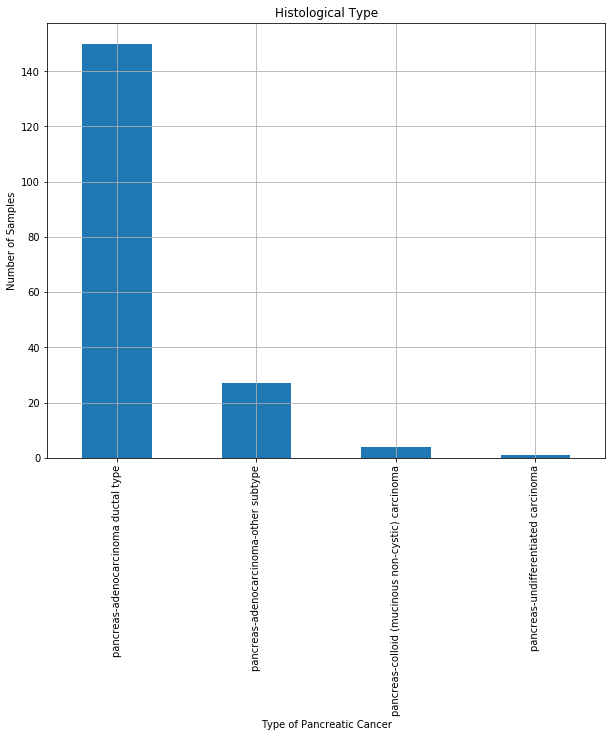

In [67]:
ax=pancreatic_cancer.groupby('histological_type').count()['sample_type'].plot(
kind='bar',
figsize=(10,8),
grid=True,
title='Histological Type')
ax.set_xlabel('Type of Pancreatic Cancer')
ax.set_ylabel('Number of Samples')

In [68]:
pancreatic_cancer.groupby('histological_type_other').count()['sample_type']

histological_type_other
82463 neuroendocrine carcinoma nos                                          1
adenocarcinoma, nos                                                         8
adenocarcinoma- nos                                                         1
ductal and micropapillary                                                   1
intraductal tubulopapillary neoplasm                                        1
invasive adenocarcinoma                                                     2
invasive, well-differentiated                                               1
moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%    1
neuroendocrine                                                              1
neuroendocrine carcinoma                                                    1
neuroendocrine carcinoma nos                                                5
not specified                                                               1
poorly differentiated adenocarcinoma    

Text(0, 0.5, 'Number of Samples')

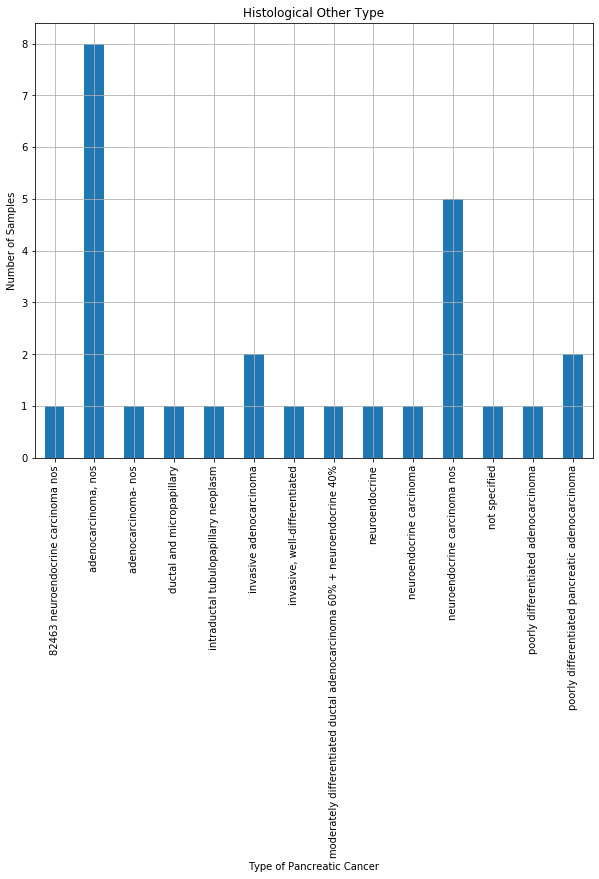

In [69]:
ax=pancreatic_cancer.groupby('histological_type_other').count()['sample_type'].plot(
kind='bar',
figsize=(10,8),
grid=True,
title='Histological Other Type')
ax.set_xlabel('Type of Pancreatic Cancer')
ax.set_ylabel('Number of Samples')

In [70]:
#Creating Dummy Variables for categorical data
cols_dummy=['sample_type','vital_status','adenocarcinoma_invasion','alcohol_history_documented',
            'alcoholic_exposure_category', 'anatomic_neoplasm_subdivision',
            'bcr_patient_canonical_status','family_history_of_cancer',
            'followup_case_report_form_submission_reason','followup_treatment_success', 'gender',
            'histologic_grading_tier_category', 'histological_type',
            'history_of_chronic_pancreatitis', 'history_of_diabetes',
            'history_of_neoadjuvant_treatment', 'icd_10','icd_o_3_site', 'initial_pathologic_diagnosis_method', 'lost_follow_up',
            'mononucleotide_and_dinucleotide_marker_panel_analysis_status','neoplasm_histologic_grade','other_dx',
            'pathologic_m', 'pathologic_n', 'pathologic_stage','pathologic_t', 'patient_death_reason', 
            'person_neoplasm_cancer_status','primary_lymph_node_presentation_assessment','primary_therapy_outcome_success', 
            'radiation_therapy','relative_cancer_type', 'residual_tumor','source_of_patient_death_reason','surgery_performed_type',
            'targeted_molecular_therapy','tissue_prospective_collection_indicator','tissue_retrospective_collection_indicator', 'tissue_source_site']

In [71]:
for col_name in pancreatic_cancer.columns:
    if(pancreatic_cancer[col_name].dtype == 'object'):
        pancreatic_cancer[col_name]= pancreatic_cancer[col_name].astype('category')
        pancreatic_cancer[col_name] = pancreatic_cancer[col_name].cat.codes

In [72]:
#Some of the data still contains NaN values. To normalise it, these data rows are filled with there respective means and rounded to zero decimal
pancreatic_cancer=pancreatic_cancer.fillna(pancreatic_cancer.mean())

In [73]:
pancreatic_cancer=pancreatic_cancer.round(0)

## 3. PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components

## 3.1 Variance Analysis of the whole data

In [74]:
#Standardising the data
scaler=StandardScaler()
scaler.fit(pancreatic_cancer)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaled_data = scaler.transform(pancreatic_cancer)
pca = PCA(n_components=70)

In [76]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=70, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
x_pca = pca.transform(scaled_data)

In [78]:
scaled_data.shape

(183, 70)

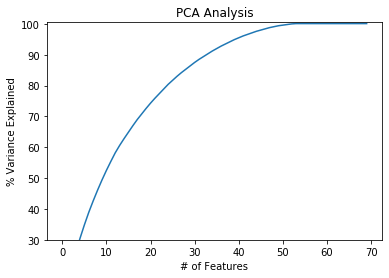

In [79]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [80]:
#Standardising the data
scaler=StandardScaler()
scaler.fit(pancreatic_cancer)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
# Maximum variance occurs when components=50 and taking components=30, we will get 80% of information from the data
scaled_data = scaler.transform(pancreatic_cancer)
pca = PCA(n_components=20)

In [82]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
x_pca = pca.transform(scaled_data)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 7.5, 14.5, 20.3, 25.6, 30.4, 34.8, 38.9, 42.6, 46.1, 49.4, 52.5,
       55.4, 58.2, 60.6, 62.8, 64.9, 67. , 69. , 70.8, 72.6])

In [84]:
b=pancreatic_cancer[pancreatic_cancer.histological_type_other!=0]
b=pancreatic_cancer[pancreatic_cancer.histological_type_other!=-1]
scaler.fit(b)
scaled_b=scaler.transform(b)
pca_b=PCA(n_components=27)
pca_b.fit(scaled_b)
b_pca=pca_b.transform(scaled_b)

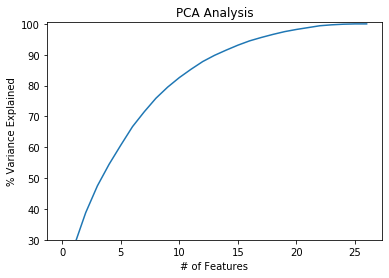

In [85]:
var=np.cumsum(np.round(pca_b.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [86]:
scaler.fit(b)
scaled_b=scaler.transform(b)
# Maximum variance occurs when components=25 and taking components=10, we will get 80% of information from the data
pca_b=PCA(n_components=10)
pca_b.fit(scaled_b)
b_pca=pca_b.transform(scaled_b)

In [87]:
var=np.cumsum(np.round(pca_b.explained_variance_ratio_, decimals=3)*100)
var

array([16.8, 27.9, 38.8, 47.5, 54.5, 60.7, 66.7, 71.5, 75.9, 79.5])

## 3.2 PCA of Whole Data

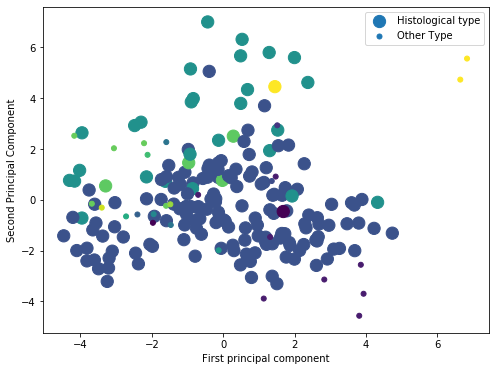

In [88]:
plt.figure(figsize=(8,6))
labels=pancreatic_cancer.histological_type.unique()
plt.scatter(x_pca[:,0],x_pca[:,1],c=pancreatic_cancer.histological_type ,s=150)
plt.scatter(b_pca[:,0],b_pca[:,1],c=b.histological_type_other, s=25)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(labels=['Histological type','Other Type'])

### After visualising the data, it can be said that :
1. pancreas-adenocarcinoma ductal type is the most common pancreas cancer in the given samples
2. From the PCA visualisation, Other Subtype cancer are separated/outliers which can be easily determined from the given features.
3. Other Subtype Cancer - Neuroendocrine specifically can be determined from its pca visualisation

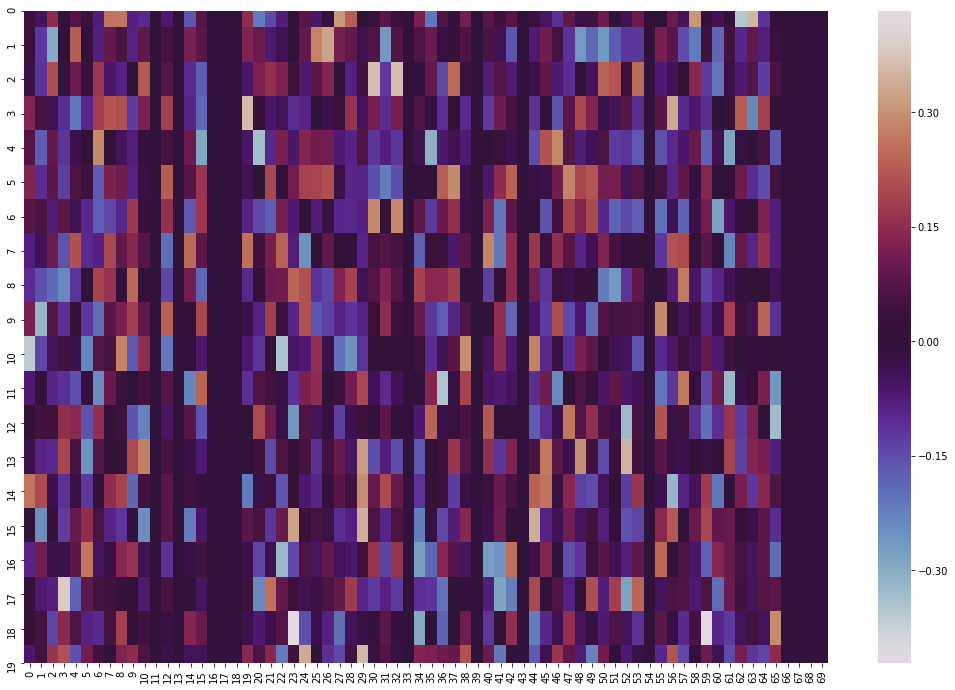

In [89]:
# This tells us about the correlation between the various feature and the principal component itself.
map= pd.DataFrame(pca.components_)
plt.figure(figsize=(18,12))
sns.heatmap(map,cmap='twilight')

## 3.3 Removing Neuroendocrine from the dataset

In [90]:
b.histological_type_other

cid
aab1-Primary solid Tumor     5
aab4-Primary solid Tumor     6
aabh-Primary solid Tumor     5
aabi-Primary solid Tumor    12
aaqm-Primary solid Tumor     8
a9ij-Primary solid Tumor    10
a9il-Primary solid Tumor    10
a9in-Primary solid Tumor    10
a9io-Primary solid Tumor    10
a9ir-Primary solid Tumor    10
a9is-Primary solid Tumor     0
a9iv-Primary solid Tumor     9
6879-Primary solid Tumor     1
a45n-Solid Tissue Normal    13
a45n-Primary solid Tumor    13
a6c1-Primary solid Tumor    11
a7op-Primary solid Tumor     4
7289-Primary solid Tumor     1
8519-Primary solid Tumor     1
a4bk-Primary solid Tumor     1
a77p-Primary solid Tumor     1
a77q-Primary solid Tumor     1
a9tj-Metastatic              1
a9tj-Primary solid Tumor     1
a7b8-Primary solid Tumor     3
a77e-Primary solid Tumor     2
a8t5-Primary solid Tumor     7
Name: histological_type_other, dtype: int8

In [91]:
#From the above cell, we know neuroendocrine cancer has categories=8,9,10
#Removing them from pancreas cancer data
pancreatic_cancer=pancreatic_cancer[pancreatic_cancer.histological_type_other!=8]
pancreatic_cancer=pancreatic_cancer[pancreatic_cancer.histological_type_other!=9]
pancreatic_cancer=pancreatic_cancer[pancreatic_cancer.histological_type_other!=10]
pancreatic_cancer.shape

(176, 70)

## 4.GSVA

In [92]:
gene_expression.data_df[0:5].head

<bound method NDFrame.head of cid      aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.45                       8.1   
A1BG                         6.40                       5.8   
A1CF                         4.70                       5.7   
A2BP1                       -1.00                       1.1   
A2LD1                        7.50                       6.8   

cid      aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
rid                                                           
SLC35E2                       7.2                       8.0   
A1BG                          6.4                       5.8   
A1CF                          3.0                       5.1   
A2BP1                         NaN                       NaN   
A2LD1                         7.3                       7.5   

cid      aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
rid                    

In [93]:
#Loading the TYPE 1 IFN genes file
geneset_df=pd.read_csv('type1_IFN.txt',header=None,sep='\t')
geneset_df.columns=['member']
geneset_df['name']='IFN'
geneset_df

,member,name
0,IFIT1,IFN
1,IFI44,IFN
2,IFIT3,IFN
3,MX2,IFN
4,OAS1,IFN
5,OAS3,IFN
6,BST2,IFN
7,IFITM1,IFN
8,MX1,IFN
9,STAT1,IFN


In [48]:
new=gene_expression.data_df
new['member']=new.index
new['index']=range(1,len(new)+1)
new.set_index('index')
result=new.merge(geneset_df,on=['member'])
result=result.drop(columns=['index','name'])
result=result.set_index('member')
result

,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
member,,,,,,,,,,,,,,,,,,,,,
BST2,12.2,12.7,12.7,11.9,10.4,10.9,11.7,11.7,9.9,10.8,...,11.0,11.0,11.8,11.0,12.0,12.2,12.5,12.9,13.4,11.6
CXCL10,9.4,8.7,8.8,7.2,6.6,4.0,5.2,9.4,6.2,5.3,...,5.8,5.3,5.8,9.0,6.0,6.1,8.1,8.5,5.1,8.6
IFI16,11.0,11.3,12.3,12.3,11.2,11.1,12.3,11.7,10.9,11.1,...,11.7,11.6,11.1,11.5,11.8,11.9,11.3,12.0,10.5,12.6
IFI27,13.5,13.8,14.4,13.2,12.0,10.7,12.5,13.1,11.6,8.2,...,10.8,12.3,13.5,11.3,11.8,12.5,13.0,14.3,14.6,12.1
IFI30,11.7,12.3,12.1,12.0,11.9,10.9,12.5,13.0,11.9,11.0,...,11.3,11.6,12.4,11.8,11.5,14.6,12.4,12.3,10.4,12.3
IFI44,9.4,11.1,11.2,10.6,8.8,8.4,9.0,11.1,8.6,7.9,...,8.3,8.3,9.8,10.0,9.3,8.9,9.3,10.6,10.8,10.9
IFIH1,9.5,10.2,10.3,10.1,9.5,8.5,9.6,10.6,9.4,8.9,...,8.8,9.0,9.2,9.3,9.4,9.0,9.6,9.5,10.3,10.0
IFIT1,9.5,10.5,12.2,10.7,8.6,6.7,9.0,11.4,8.5,7.2,...,8.3,7.6,9.6,8.7,9.4,8.4,9.5,10.4,11.1,10.2
IFIT2,8.6,8.9,10.5,9.4,8.3,6.7,7.9,10.3,8.5,8.0,...,7.3,7.9,8.7,8.6,9.3,8.2,8.9,8.9,8.7,9.1


## 4.1 Plotting of TYype 1 IFN with samples

In [ ]:
result.plot()
plt.show()

In [94]:
gene_expression.data_df.describe()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
count,17820.000000,17933.000000,17482.000000,17451.000000,17504.000000,17671.000000,17708.000000,18142.000000,17882.000000,17662.000000,...,17778.000000,18008.000000,17845.000000,17886.000000,17839.000000,17884.000000,17872.000000,17636.000000,17766.000000,17531.000000
mean,7.600212,7.639892,7.577106,7.728775,7.796076,7.664129,7.628627,7.698158,7.556334,7.431312,...,7.780396,7.691941,7.575872,7.685672,7.732917,7.597680,7.657147,7.540970,7.431868,7.660132
std,3.387306,3.334036,3.388864,3.184340,3.139338,3.282318,3.324786,3.290414,3.436954,3.562089,...,3.161582,3.271740,3.411722,3.301737,3.225011,3.399501,3.317512,3.445405,3.518578,3.280430
min,-1.700000,-2.300000,-3.500000,-0.600000,-0.600000,-2.100000,-1.800000,-4.100000,-4.700000,-3.800000,...,-0.900000,-3.500000,-3.100000,-6.000000,-7.400000,-1.700000,-2.300000,-0.800000,-5.000000,-2.200000
25%,5.700000,5.800000,5.500000,5.900000,6.000000,5.800000,5.700000,6.000000,5.600000,5.400000,...,6.100000,5.900000,5.600000,5.900000,6.000000,5.700000,5.800000,5.500000,5.300000,5.800000
50%,8.400000,8.400000,8.300000,8.500000,8.500000,8.500000,8.400000,8.500000,8.300000,8.300000,...,8.500000,8.500000,8.400000,8.500000,8.500000,8.400000,8.400000,8.300000,8.300000,8.500000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,17.600000,17.100000,18.000000,18.400000,18.700001,17.900000,18.400000,17.100000,17.299999,17.600000,...,19.200001,17.100000,18.000000,18.200001,17.700001,18.600000,18.299999,20.000000,18.100000,17.299999


In [95]:
gene_expression.data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 13.7+ MB


In [96]:
gene_expression.data_df

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30
ZZEF1,10.10,9.8,9.8,9.7,10.10,10.4,9.7,10.6,10.00,9.90,...,10.60,9.90,9.8,10.30,10.4,10.20,9.9,9.80,9.6,10.90


In [97]:
gene_expression.data_df=gene_expression.data_df.fillna(gene_expression.data_df.mean())
gene_expression.data_df.round(2)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.20,8.00,7.65,8.10,8.20,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.40,5.80,6.70,6.60,6.30,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.00,5.10,4.40,4.20,1.60,6.8,6.00,7.43,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,7.58,7.73,0.10,7.66,7.63,1.7,0.40,-1.50,...,3.50,1.30,-0.3,7.69,2.1,2.00,0.0,7.54,2.0,7.66
A2LD1,7.50,6.8,7.30,7.50,7.40,6.60,7.10,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,9.20,9.3,9.40,9.40,9.30,9.90,9.10,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.50,12.50,13.00,12.20,12.90,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30
ZZEF1,10.10,9.8,9.80,9.70,10.10,10.40,9.70,10.6,10.00,9.90,...,10.60,9.90,9.8,10.30,10.4,10.20,9.9,9.80,9.6,10.90


In [98]:
XV = TSNE(n_components=2).\
    fit_transform(gene_expression.data_df.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})


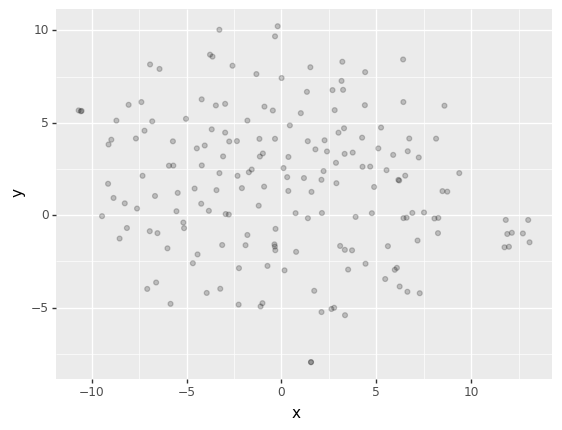

<ggplot: (-9223371896327954100)>

In [99]:
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)

## 4.2 GSVA

In [ ]:
pathways_df=gsva(gene_expression.data_df,geneset_df,tempdir="C:/Users/Anchalia/AppData/Local/Temp/weirathe.1jub25nv")
pathways_df

In [ ]:
YV = TSNE(n_components=2).\
    fit_transform(pathways_df.T)
pf = pd.DataFrame(YV).rename(columns={0:'x',1:'y'})
(ggplot(pf,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)